In [ ]:
 	
from PIL import Image  
from PIL import ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import os 
   

In [ ]:
#Installation de la librairie Pillow utilisée pour la Data Augmentation
pip install --upgrade Pillow

     |████████████████████████████████| 2.2MB 4.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


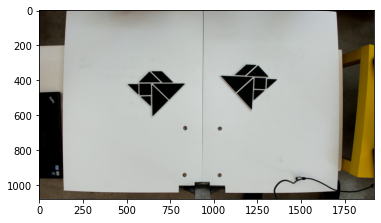

In [ ]:
from PIL import Image
im = Image.open("/frame6833.jpg")
img2=Image.open("/frame6834.jpg")
plt.imshow(im)

In [ ]:
#Comptage du nombre d'images dans chaque dossier 
from os import listdir
from os.path import isfile, join
monRepertoire="/content/drive/My Drive/DATASET FINAL/images_finales/"
dossiers=listdir(monRepertoire)
liste=[]
for i in dossiers:
  rep="/content/drive/My Drive/DATASET FINAL/images_finales/{}".format(i)
  print(i,':',len(listdir(rep)))
  a=len(listdir(rep))
  liste.append(int(a))
print("Nombre d'images total:",sum(liste))

lapin : 746
cygne : 495
chat : 1783
bol : 452
bateau : 4036
maison : 1879
marteau : 585
montagne : 551
pont : 905
renard : 1202
tortue : 773
coeur : 397
Nombre d'images total: 13804


In [ ]:
path="/content/drive/My Drive/DATASET FINAL/images_finales/"

repdossier=path+dossiers[0]
images=listdir(repdossier)
images[0]
repdossier

'/content/drive/My Drive/DATASET FINAL/images_finales/lapin'

In [ ]:
def decoupage(chemin):
  im=Image.open(chemin)
  s=im.size
  nom=chemin.replace(".jpg","")
  img3=im.crop((0, 0, (s[0]/2), 1080))
  s1=img3.save(('{}'.format((nom+'_1.jpg'))))
  img4=im.crop((s[0]/2, 0, s[0], 1080))
  s2=img4.save('{}'.format((nom+'_2.jpg')))
  return s1,s2

In [ ]:
def transformations(chemin):
  im=Image.open(chemin)
  nom=chemin.replace('.jpg','')
  imgt1=im.transpose(Image.ROTATE_90)
  s1=imgt1.save('{}'.format((nom+'_3.jpg'))) #Rotation 90 et 270
  imgt2=im.transpose(Image.ROTATE_180)
  s2=imgt2.save('{}'.format((nom+'_4.jpg')))
  imgt3=im.transpose(Image.ROTATE_270)
  s3=imgt3.save('{}'.format((nom+'_5.jpg')))
  img_gs=im.convert("L")
  s4=img_gs.save('{}'.format((nom+'_6.jpg'))) 
  return s1,s2,s3,s4

In [ ]:
#Code de correction car problème lors de la Data Augmentation des cygnes
import os
path="/content/drive/My Drive/DATASET FINAL/images_finales/"
dossiers=listdir(path)
path="/content/drive/My Drive/DATASET FINAL/images_finales/lapin/"


In [ ]:
#Code de rectification des erreurs, qui permet de supprimer rapidement les fichiers d'un dossier. 

path="/content/drive/My Drive/DATASET FINAL/images_finales/maison/"

for i in os.listdir(path):
  if len(i)>13:
    if os.path.exists(path+i):
      os.remove(path+i)
      print('Fichier supprimé!')
    else:
      print("Impossible de supprimer le fichier car il n'existe pas")
print(len(os.listdir(path))) 

In [ ]:
import shutil
#Code pour déplacer les images des différents groupes 

c=0
path1="/content/drive/My Drive/DATASET FINAL/images nettoyées et labelisées (bis)/coeur"
path2="/content/drive/My Drive/DATASET FINAL/images_finales/coeur/"
long=len(os.listdir(path1))
for i in os.listdir(path1):
  src=path1+'/'+i
  dest=path2+i
  shutil.copy(src,dest)
  c=c+1
  print(c,'/',long,"images transférées")

#lapin fait
#cygne fait
#Chat fait
#Bol Fait
#Bateau fait
#Maison fait
#Marteau fait
#Montagne fait
#Pont fait
#Tortue fait















1 / 141 images transférées
2 / 141 images transférées
3 / 141 images transférées
4 / 141 images transférées
5 / 141 images transférées
6 / 141 images transférées
7 / 141 images transférées
8 / 141 images transférées
9 / 141 images transférées
10 / 141 images transférées
11 / 141 images transférées
12 / 141 images transférées
13 / 141 images transférées
14 / 141 images transférées
15 / 141 images transférées
16 / 141 images transférées
17 / 141 images transférées
18 / 141 images transférées
19 / 141 images transférées
20 / 141 images transférées
21 / 141 images transférées
22 / 141 images transférées
23 / 141 images transférées
24 / 141 images transférées
25 / 141 images transférées
26 / 141 images transférées
27 / 141 images transférées
28 / 141 images transférées
29 / 141 images transférées
30 / 141 images transférées
31 / 141 images transférées
32 / 141 images transférées
33 / 141 images transférées
34 / 141 images transférées
35 / 141 images transférées
36 / 141 images transférées
3

In [ ]:
print(len(os.listdir("/content/drive/My Drive/DATASET FINAL/images_finales/renard/")))

1202


In [ ]:
images=os.listdir("/content/drive/My Drive/DATASET FINAL/images_finales/maison/")
print(images.index("frame1899_2.jpg"))
print(len(images[309]))

309
15


In [ ]:
!ls "/content/drive/My Drive/DATASET FINAL/images_finales/"

bateau	chat   cygne  maison   montagne  renard
bol	coeur  lapin  marteau  pont	 tortue


In [ ]:
#Code pour la Data Augmentation 

path="/content/drive/My Drive/DATASET FINAL/images_finales/"
dossiers=os.listdir(path)
'''dossiers='lapin', 'cygne', 'chat', 'bol', 'bateau', 'maison', 'marteau', 
'montagne', 'pont','renard', 'tortue', 'coeur', '.ipynb_checkpoints']'''

images=os.listdir(path+'/'+dossiers[3])
for i in images:
  chemin=path+dossiers[3]+'/'+i
  nom=chemin.replace('.jpg','')
  im=Image.open(chemin)
  decoupage(chemin)
  transformations(chemin)
  im2=im.transpose(Image.FLIP_LEFT_RIGHT)
  im2.save('{}'.format((nom+'_7.jpg')))
  im4=im.rotate(35)

  #Transformations supplémentaires pour cygne, bol (ajout de rotate 45),pont,maison,montagne,tortue,coeur

  im4.save('{}'.format((nom+'_8.jpg')))
  im6=im.rotate(45)
  im6.save('{}'.format((nom+'_9.jpg')))
  im8=im.rotate(120)
  im8.save('{}'.format((nom+'_10.jpg')))
  img_lum = im.point(lambda i: i * 1.5)
  img_lum.save('{}'.format((nom+'_11.jpg')))
  enhancer = ImageEnhance.Contrast(im)
  factor = 0.6
  im_output = enhancer.enhance(factor)
  im_output.save('{}'.format((nom+'_12.jpg')))




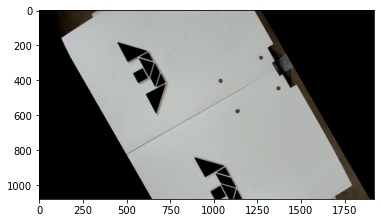

In [ ]:
#Affichage d'une image pour débuggage

image=Image.open("/content/drive/My Drive/DATASET FINAL/images_finales/pont/frame14168_10.jpg")
plt.imshow(image)

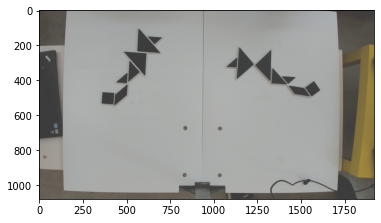

In [ ]:

im=Image.open("/content/drive/My Drive/DATASET FINAL/images_finales/renard/frame38360.jpg")
enhancer = ImageEnhance.Contrast(im)
factor = 0.6 #decrease constrast
im_output = enhancer.enhance(factor)
im_output.save('less-contrast-image.png')
plt.imshow(im_output)

In [ ]:
#Code utilisé pour corriger des images supprimées par erreur en important des copies d'un dossier à un autre dans Google Drive.
images=os.listdir("/content/drive/My Drive/DATASET FINAL/images_finales/cygne")
#print(images)
path="/content/drive/My Drive/DATASET FINAL/images_finales/coeur/"
for i in os.listdir("/content/drive/My Drive/DATASET FINAL/images_finales/coeur"):
  os.rename(path+i,path+(i.replace("Copy of","")))

In [ ]:
print(os.listdir("/content/drive/My Drive/DATASET FINAL/images_finales/cygne"))

[' frame19774.jpg', ' frame19773.jpg', ' frame19772.jpg', ' frame19770.jpg', ' frame19768.jpg', ' frame19766.jpg', ' frame19765.jpg', ' frame19763.jpg', ' frame19762.jpg', ' frame19761.jpg', ' frame18518.jpg', ' frame18517.jpg', ' frame18516.jpg', ' frame18515.jpg', ' frame18514.jpg', ' frame18513.jpg', ' frame18512.jpg', ' frame18511.jpg', ' frame18508.jpg', ' frame18507.jpg', ' frame18506.jpg', ' frame18505.jpg', ' frame18504.jpg', ' frame19775.jpg', ' frame19771.jpg', ' frame19760.jpg', ' frame18519.jpg', ' frame18510.jpg', ' frame19771 (1).jpg', ' frame19769.jpg', ' frame19767.jpg', ' frame19764.jpg']
